In [59]:
#1、导入必要的库
import miceforest as mf # miceforest导入失败的，先去终端 r安装一下
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsclassifier ,KNeighborsRegressor
#from sklearn.ensemble import RandomForestRegressor,RandomForestclassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [60]:
sns.set (font= 'SimHei' ,font_scale=1.5) #windows用户解决seaborn中文显示问题
#plt.rcParams ['font.sans-serif ' ] = [ 'Arial Unicode MS']#用来正常显示中文标签
#plt.rcParams [ 'axes.unicode_minus ']= False #用来正常显示负号

In [102]:
data = pd.read_excel('D:\\学校\\毕业论文\\数据\\城市群\\总城市群面板2.xlsx',sheet_name=0)
data.head()
data0=data.iloc[:,2:]
data0

,iu,gov,fdi,pop,gdp,teans,edu,m
0,1.717397,0.259630,0.586473,683.820000,3261.0,7.354439,392.393642,8.877473
1,0.893475,0.127518,0.667270,776.850000,26532.0,12.457444,264.888553,3.476170
2,0.789845,0.582225,0.184434,574.530000,15188.0,4.549281,24.658927,2.419258
3,0.545797,0.563550,0.155933,524.260000,18387.0,4.119951,112.516192,1.385234
4,1.268282,0.785688,0.399129,363.270000,14236.0,6.568493,23.378415,2.394962
...,...,...,...,...,...,...,...,...
2239,0.869386,0.183946,0.456446,48.934275,5338.0,1.121787,277.333333,2.349930
2240,0.654469,0.157473,0.498561,28.643815,595.0,3.666667,133.238952,2.237398
2241,1.212537,0.255427,0.468818,43.532816,34481.0,3.135850,31.154717,2.949930
2242,1.513269,0.348140,0.112789,23.533488,44794.0,7.759494,53.645570,2.369495


In [109]:
data0.isnull().sum()

iu        6
gov       4
fdi      12
pop       4
gdp       7
teans    60
edu      29
m         6
dtype: int64

In [110]:
data0.isna().mean()

iu       0.002674
gov      0.001783
fdi      0.005348
pop      0.001783
gdp      0.003119
teans    0.026738
edu      0.012923
m        0.002674
dtype: float64

# 单一插补

In [111]:
#单一插补:如果只想创建一个单插补的数据集，那么可以使用KernelDataSet#实例化一个单一插补对象
kds = mf.KernelDataSet(data,save_all_iterations=True,random_state=10)

C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(


In [112]:
# miceforest是通过迭代的随机森林模型来“填充”(插补）数据集中的缺失数据。在每次迭代中，将使用数据集中的其他变量来估算数据集中的每个指定的变量，这些迭代持续运行，直到满足收敛为止。这个迭代过程会根据均值收敛状态来确定，但是一般不需要超过5次迭f体
#关于随机森林的优势是可以并行化，通过在随机森林的fit和预测方法中设置n_jobs参数，可以节省大量时间
kds.mice(iterations= 3,
        n_jobs = -1#以最大并行执行
        )
#这里我们设置的参数都可以传递给RandomForestclassifier或RandomForestRegressor。
# iterations迭代次数，n_jobs在数据量很大的时候会有比较明显的时间优化，但是在小数据上并没有明显的差别。


C:\Users\13997\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [113]:
kds

              Class: KernelDataSet
         Iterations: 3
  Imputed Variables: 8
save_all_iterations: True

In [114]:
#返回使用单一填补方法填补好缺失值的完整数据集
completed_data = kds.complete_data()
completed_data.head()


,city,year,iu,gov,fdi,pop,gdp,teans,edu,m
0,北京市,2003,1.717397,0.259630,0.586473,683.82,3261.0,7.354439,392.393642,8.877473
1,天津市,2003,0.893475,0.127518,0.667270,776.85,26532.0,12.457444,264.888553,3.476170
2,石家庄市,2003,0.789845,0.582225,0.184434,574.53,15188.0,4.549281,24.658927,2.419258
3,唐山市,2003,0.545797,0.563550,0.155933,524.26,18387.0,4.119951,112.516192,1.385234
4,秦皇岛市,2003,1.268282,0.785688,0.399129,363.27,14236.0,6.568493,23.378415,2.394962


In [115]:
completed_data. isnull( ).sum ( )


city     0
year     0
iu       0
gov      0
fdi      0
pop      0
gdp      0
teans    0
edu      0
m        0
dtype: int64

In [116]:
completed_data.mean()

C:\Users\13997\AppData\Local\Temp/ipykernel_5124/1473725182.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  completed_data.mean()


year      2011.000000
iu           0.923995
gov          0.376324
fdi          0.501021
pop        456.694596
gdp      33577.842692
teans        4.514029
edu        165.156829
m            2.462444
dtype: float64

In [117]:
completed_data.mean( ) - data.mean( ) # 查看插补前后数据集统计量的变化情况
(completed_data.mean( ) - data.mean( ) )/data.mean()*100# 查看插补前后数据集统计量的变化情况


C:\Users\13997\AppData\Local\Temp/ipykernel_5124/1499997860.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  completed_data.mean( ) - data.mean( ) # 查看插补前后数据集统计量的变化情况
C:\Users\13997\AppData\Local\Temp/ipykernel_5124/1499997860.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (completed_data.mean( ) - data.mean( ) )/data.mean()*100# 查看插补前后数据集统计量的变化情况


year     0.000000
iu      -0.035729
gov     -0.064185
fdi     -0.016000
pop      0.091724
gdp      0.332926
teans    0.659326
edu      0.160030
m        0.165586
dtype: float64

In [118]:
completed_data.to_excel('D:\\学校\\毕业论文\\数据\\城市群\\mice单一插补.xlsx',index=False)

# 多重插补

In [119]:
#多重插补︰使用MultipleImputedKernel实例化多重插补对象
kernel = mf.MultipleImputedKernel(
    data,
    datasets = 4 ,#填补四次
    save_all_iterations=True,
    save_models =1,#保留最终变量模型，必须大于0
    random_state=10
)

# Run the MICE algorithm for 3 iterations on each of the datasetskernel.mice( iterations= 3,
#n_jobs=2
print(kernel)
"""
多重插补相对于单一插补需要更长的处理时间，如果我们想要使用MICE来多重插补缺失值，但又项节约新模型的训练时间，那我们可以选择使用MultipleImputedKernel对象来插补新数据集。当中的impute_new_data( )函数使用的是MultipleImputedKernel收集到的随机森林来执行多次插补，因此无需在每次迭代时都更新随机森林模型，大大的提高了模型的训练效率
"""

              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 4
         Iterations: 0
  Imputed Variables: 8
save_all_iterations: True


C:\Users\13997\anaconda3\lib\site-packages\miceforest\MultipleImputedKernel.py:160: UserWarning: MultipleImputedKernel is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(


'\n多重插补相对于单一插补需要更长的处理时间，如果我们想要使用MICE来多重插补缺失值，但又项节约新模型的训练时间，那我们可以选择使用MultipleImputedKernel对象来插补新数据集。当中的impute_new_data( )函数使用的是MultipleImputedKernel收集到的随机森林来执行多次插补，因此无需在每次迭代时都更新随机森林模型，大大的提高了模型的训练效率\n'

In [120]:
kernel.mice(iterations= 3,
        n_jobs = -1#以最大并行执行
        )
kernel

C:\Users\13997\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 4
         Iterations: 3
  Imputed Variables: 8
save_all_iterations: True

In [145]:
kernel.complete_data(0)#[0:3]

,city,year,iu,gov,fdi,pop,gdp,teans,edu,m
0,北京市,2003,1.717397,0.259630,0.586473,683.820000,3261.0,7.354439,392.393642,8.877473
1,天津市,2003,0.893475,0.127518,0.667270,776.850000,26532.0,12.457444,264.888553,3.476170
2,石家庄市,2003,0.789845,0.582225,0.184434,574.530000,15188.0,4.549281,24.658927,2.419258
3,唐山市,2003,0.545797,0.563550,0.155933,524.260000,18387.0,4.119951,112.516192,1.385234
4,秦皇岛市,2003,1.268282,0.785688,0.399129,363.270000,14236.0,6.568493,23.378415,2.394962
...,...,...,...,...,...,...,...,...,...,...
2239,咸阳市,2019,0.869386,0.183946,0.456446,48.934275,5338.0,1.121787,277.333333,2.349930
2240,宝鸡市,2019,0.654469,0.157473,0.498561,28.643815,595.0,3.666667,133.238952,2.237398
2241,渭南市,2019,1.212537,0.255427,0.468818,43.532816,34481.0,3.135850,31.154717,2.949930
2242,铜川市,2019,1.513269,0.348140,0.112789,23.533488,44794.0,7.759494,53.645570,2.369495


In [122]:
completed_data. isnull( ).sum ( )

city     0
year     0
iu       0
gov      0
fdi      0
pop      0
gdp      0
teans    0
edu      0
m        0
dtype: int64

In [123]:
(completed_data.mean()-data.mean())/data.mean()*100# 查看插补前后数据集统计量的变化情况


C:\Users\13997\AppData\Local\Temp/ipykernel_5124/1225314310.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (completed_data.mean()-data.mean())/data.mean()*100# 查看插补前后数据集统计量的变化情况


year     0.000000
iu      -0.035729
gov     -0.064185
fdi     -0.016000
pop      0.091724
gdp      0.332926
teans    0.659326
edu      0.160030
m        0.165586
dtype: float64

In [124]:
#同一总体新数据可直接调用
#kernel.impute_new_data(datanew)
#kernel
#kernel.complete_data()

# 图形诊断

## 插补值分布

C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


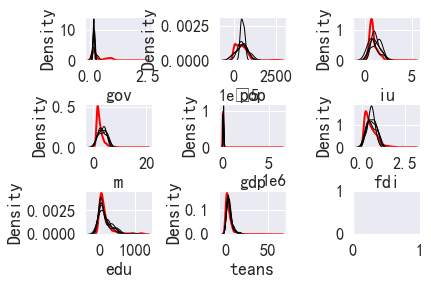

In [125]:
#填补数据与原始数据对比
kernel.plot_imputed_distributions(wspace=1,hspace=1)
#红线原始，黑线是插补（估算值）

C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


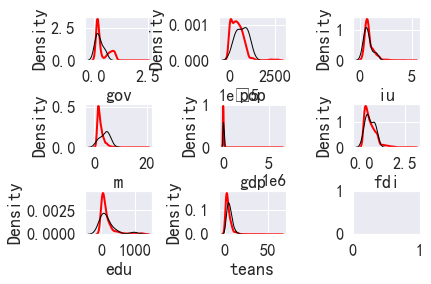

In [126]:
kds.plot_imputed_distributions(wspace=1,hspace=1)

## 相关性收敛

C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


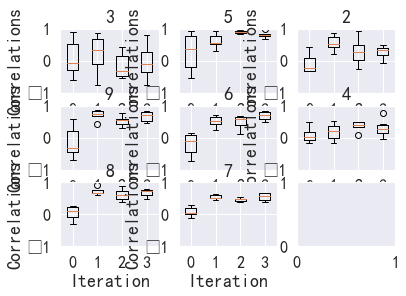

In [127]:
#调用相关性收敛诊断方法
kernel.plot_correlations ()
#这里的横坐标是:指定属性在原始不完整数据集中(1个)，以及在每一个完整数据集在指定迭代次数
#(.mice(iterations = 3))(每迭代一次，生成一个保存一个新的数据集，迭代次数为3，则保存了三个完整数据集)下的收敛情况。
#每一个箱子︰是所有完整数据集(datasetes = 4）中当前属性的排列组合结果，每个箱子由6个点组成(4!=6)。
#因此这个箱型图可以理解为对原始数据集进行缺失值插补，最终需要生成4个完整的数据集，这四个完整数据集在我们设置的3次迭代下的收敛情况!


In [128]:
data0.corr()

,iu,gov,fdi,pop,gdp,teans,edu,m
iu,1.000000,-0.095338,0.026899,0.008472,0.018193,0.012052,0.041851,0.195959
gov,-0.095338,1.000000,0.072936,0.036786,0.005755,-0.003282,0.001933,0.059494
fdi,0.026899,0.072936,1.000000,0.048783,-0.005913,0.178112,0.158666,0.185125
pop,0.008472,0.036786,0.048783,1.000000,0.012782,0.203572,0.182167,0.139623
gdp,0.018193,0.005755,-0.005913,0.012782,1.000000,0.069733,0.049899,0.120630
teans,0.012052,-0.003282,0.178112,0.203572,0.069733,1.000000,0.272538,0.237193
edu,0.041851,0.001933,0.158666,0.182167,0.049899,0.272538,1.000000,0.308177
m,0.195959,0.059494,0.185125,0.139623,0.120630,0.237193,0.308177,1.000000


## 变量重要性

In [129]:
kernel

              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 4
         Iterations: 3
  Imputed Variables: 8
save_all_iterations: True

AxesSubplot(0.125,0.125;0.62x0.755)


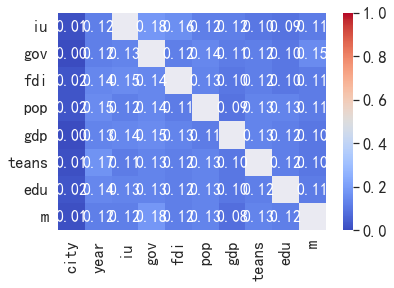

In [130]:
#调用变量重要性诊断方法
kernel.plot_feature_importance( annot=True,vmin=0 ,vmax=1)
#显示的数字是从sklearn随机森林的_feature_importance属性返回的，每个正方形代表列变量在估算行变量中的重要性。


In [131]:
kernel.get_feature_importance()

array([[  43.,  670.,   nan,  994.,  876.,  693.,  677.,  532.,  494.,
         586.],
       [  26.,  703.,  776.,   nan,  754.,  860.,  646.,  752.,  627.,
         909.],
       [ 113.,  818.,  887.,  786.,   nan,  731.,  581.,  686.,  556.,
         642.],
       [ 148.,  886.,  685.,  806.,  651.,   nan,  556.,  763.,  793.,
         652.],
       [  16.,  781.,  813.,  877.,  771.,  643.,   nan,  744.,  679.,
         565.],
       [  64., 1017.,  664.,  750.,  732.,  781.,  617.,   nan,  689.,
         565.],
       [ 107.,  878.,  792.,  783.,  738.,  803.,  588.,  725.,   nan,
         650.],
       [  51.,  653.,  696.,  994.,  660.,  711.,  474.,  739.,  699.,
          nan]])

## 均值收敛

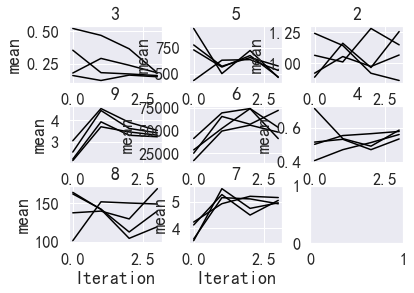

In [132]:
kernel.plot_mean_convergence(wspace=0.3,hspace=0.4)#无法看出收敛过程

# 预测均值（PMM）匹配

In [133]:
kernel = mf.MultipleImputedKernel(data = data,
                                  datasets = 4 ,
                                  mean_match_candidates = 5 )
kernel

C:\Users\13997\anaconda3\lib\site-packages\miceforest\MultipleImputedKernel.py:160: UserWarning: MultipleImputedKernel is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(


              Class: MultipleImputedKernel
       Models Saved: Last Iteration
           Datasets: 4
         Iterations: 0
  Imputed Variables: 8
save_all_iterations: True

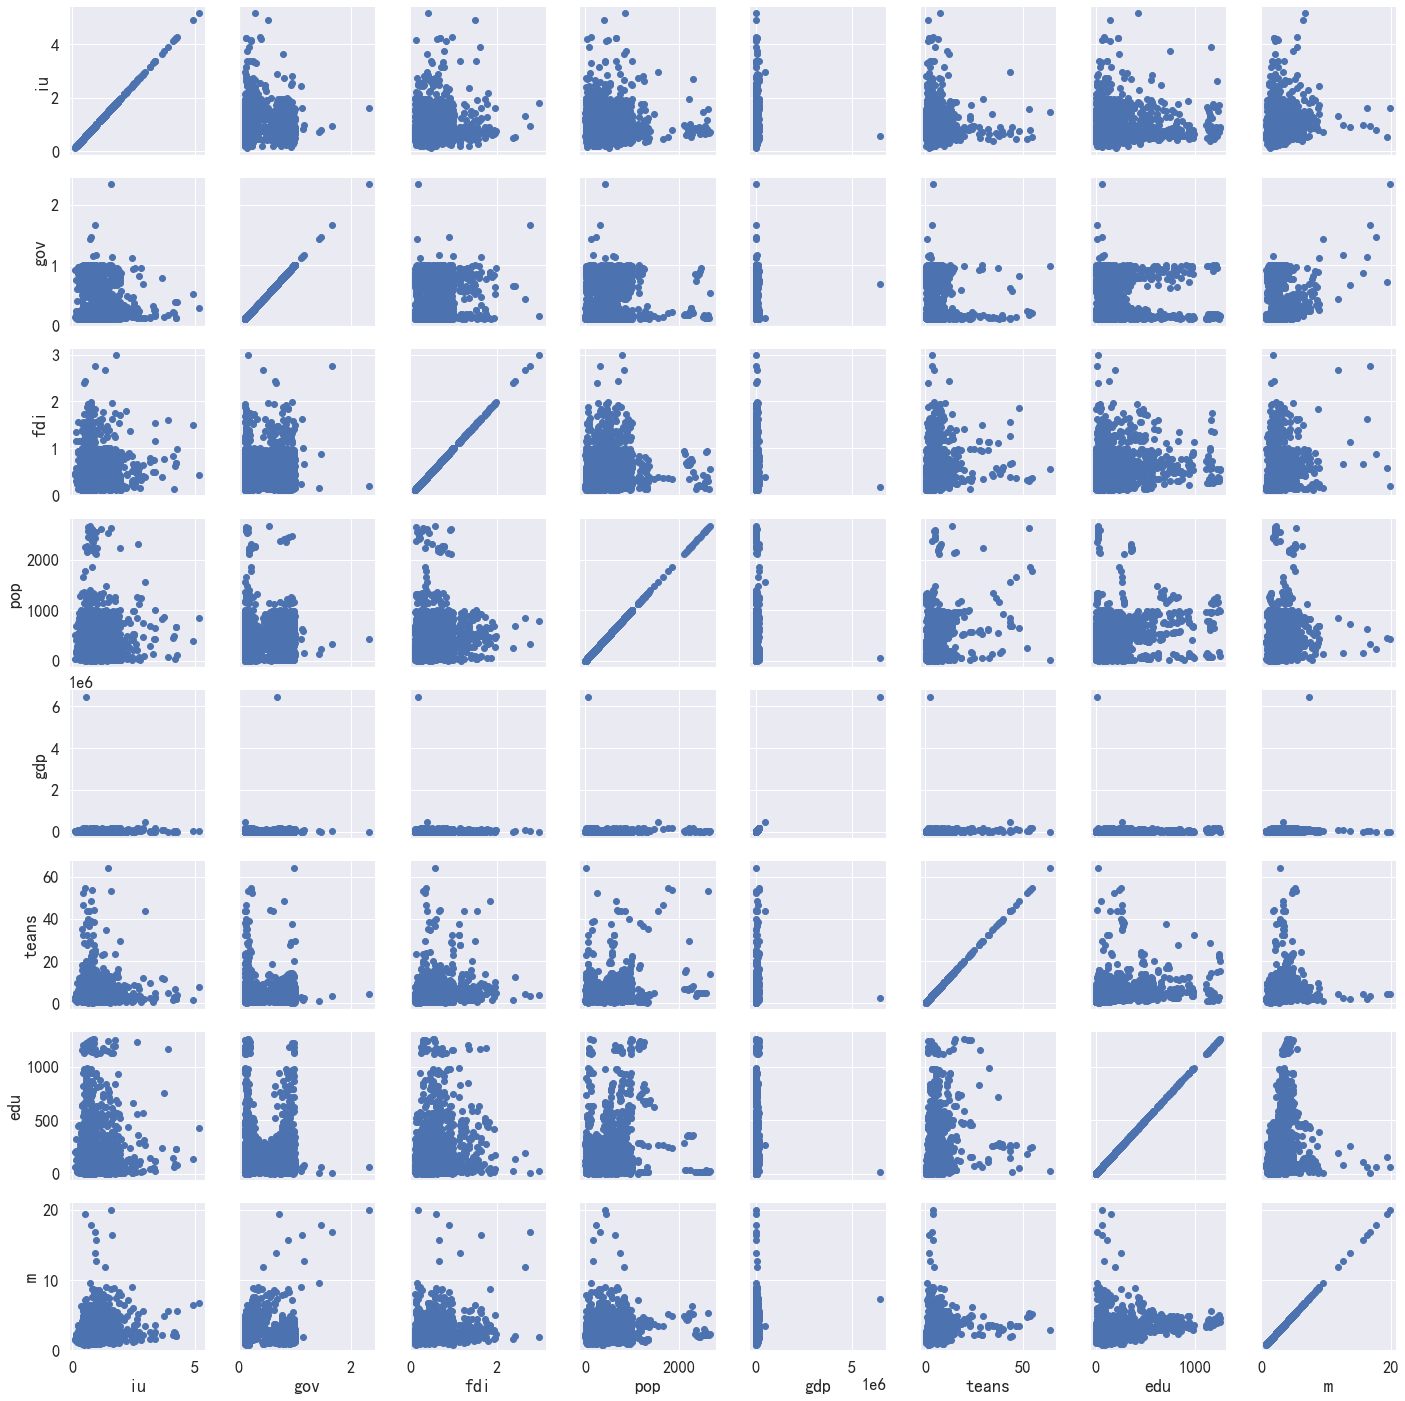

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
null_index = data0.isnull().sum()[data0.isnull().sum()!= 0].index
g = sns.PairGrid(data0.loc [:,null_index ])
g.map(plt.scatter )


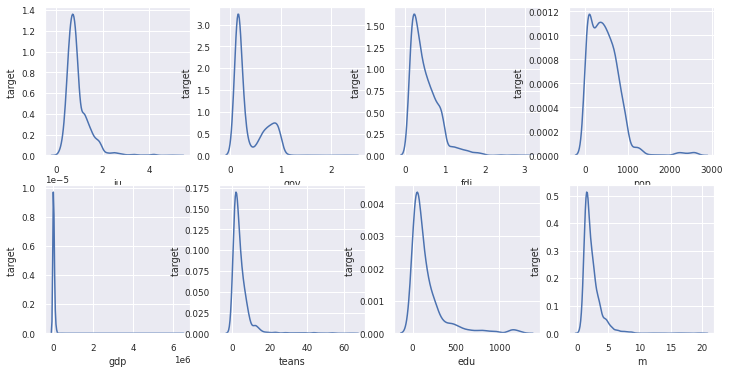

In [175]:
plt.figure( figsize=(12,6))#设置画布大小
i = 0
for col in data0.columns [0:8]:
    i += 1
    ax = plt.subplot (2,4,i)#多子图的子图所在坐标

    sns. kdeplot(             #绘制y相对于x的相关关系图
        data = data0[col])

    ax.set_xlabel (col)#x轴标签
    ax.set_ylabel ( "target " )#y轴标签
plt.show ( )


C:\Users\13997\anaconda3\lib\site-packages\miceforest\MultipleImputedKernel.py:160: UserWarning: MultipleImputedKernel is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set

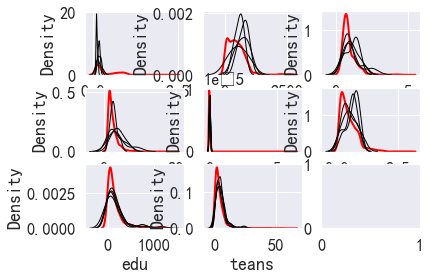

In [141]:
#mean_match_candicates 分类投票，回归均值
kernel2 = mf . MultipleImputedKernel(
    data0,
    datasets = 4,
    save_all_iterations=True,
    save_models=1,
    random_state =10,
    mean_match_candidates=5#使用PMM，选取周边点数为5个
)
kernel2.mice(3)
kernel2.impute_new_data(data0)
kernel2.plot_imputed_distributions()


C:\Users\13997\anaconda3\lib\site-packages\miceforest\MultipleImputedKernel.py:160: UserWarning: MultipleImputedKernel is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set

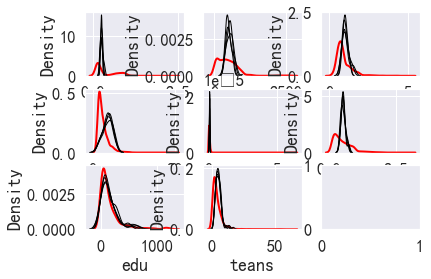

In [138]:
kernel2 = mf . MultipleImputedKernel(
    data0,
    datasets = 4,
    save_all_iterations=True,
    save_models=1,
    random_state =10,
    mean_match_candidates=0#只使用预测值
)
kernel2.mice(3)
kernel2.impute_new_data(data0)
kernel2.plot_imputed_distributions()


C:\Users\13997\anaconda3\lib\site-packages\miceforest\MultipleImputedKernel.py:160: UserWarning: MultipleImputedKernel is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set

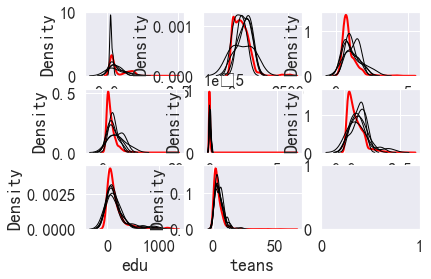

In [151]:
#最佳！
kernel3 = mf.MultipleImputedKernel(
    data0,
    save_all_iterations= True,
    save_models=1,
    datasets = 5,
    random_state=0,
    mean_match_candidates = 5
)
kernel3.mice(iterations =3 ,n_jobs = -1)
kernel3.plot_imputed_distributions()


C:\Users\13997\anaconda3\lib\site-packages\miceforest\MultipleImputedKernel.py:160: UserWarning: MultipleImputedKernel is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\miceforest\KernelDataSet.py:174: UserWarning: KernelDataSet is depreciated as of version 5.0.0 in favor of the more efficient ImputationKernel, and will be removed in a future release.
  warnings.warn(
C:\Users\13997\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set

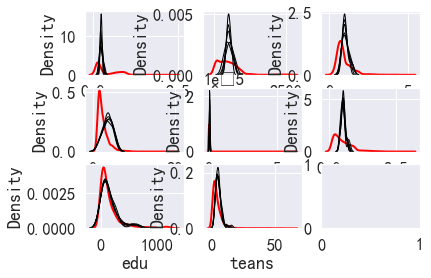

In [144]:
kernel30 = mf.MultipleImputedKernel(
    data0,
    save_all_iterations= True,
    save_models=1,
    datasets = 5,
    random_state=0,
    mean_match_candidates = 0
)
kernel3.mice(iterations =3 ,n_jobs = -1)
kernel3.plot_imputed_distributions()

# 使用插补值

## 返回填补好的数据集

In [162]:
kernel3.complete_data(0)

,iu,gov,fdi,pop,gdp,teans,edu,m
0,1.717397,0.259630,0.586473,683.820000,3261.0,7.354439,392.393642,8.877473
1,0.893475,0.127518,0.667270,776.850000,26532.0,12.457444,264.888553,3.476170
2,0.789845,0.582225,0.184434,574.530000,15188.0,4.549281,24.658927,2.419258
3,0.545797,0.563550,0.155933,524.260000,18387.0,4.119951,112.516192,1.385234
4,1.268282,0.785688,0.399129,363.270000,14236.0,6.568493,23.378415,2.394962
...,...,...,...,...,...,...,...,...
2239,0.869386,0.183946,0.456446,48.934275,5338.0,1.121787,277.333333,2.349930
2240,0.654469,0.157473,0.498561,28.643815,595.0,3.666667,133.238952,2.237398
2241,1.212537,0.255427,0.468818,43.532816,34481.0,3.135850,31.154717,2.949930
2242,1.513269,0.348140,0.112789,23.533488,44794.0,7.759494,53.645570,2.369495


In [188]:
datasets = []
df = []
for i in range(kernel3.dataset_count()) :
    datasets.append(kernel3.complete_data(i))
    dd = pd.DataFrame((datasets[i].mean()-data0.mean())/data0.mean()*100 )
    df.append(dd)
#返回这些插补好的多个数据集，最好比较每个数据集相对于原始数据的统计量变化:
#kernel.iteration_count( )#查看当前填补对象迭代次数
#kernel.na_counts #查看插补之前数据集的缺失情况
df[1]

,0
iu,0.089703
gov,-0.059320
fdi,0.144394
pop,-0.042373
gdp,0.343364
teans,0.065234
edu,-0.071132
m,0.061085


AttributeError: 'AxesSubplot' object has no attribute 'set_ylabe1'

C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 34917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\13997\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25454 missing from c

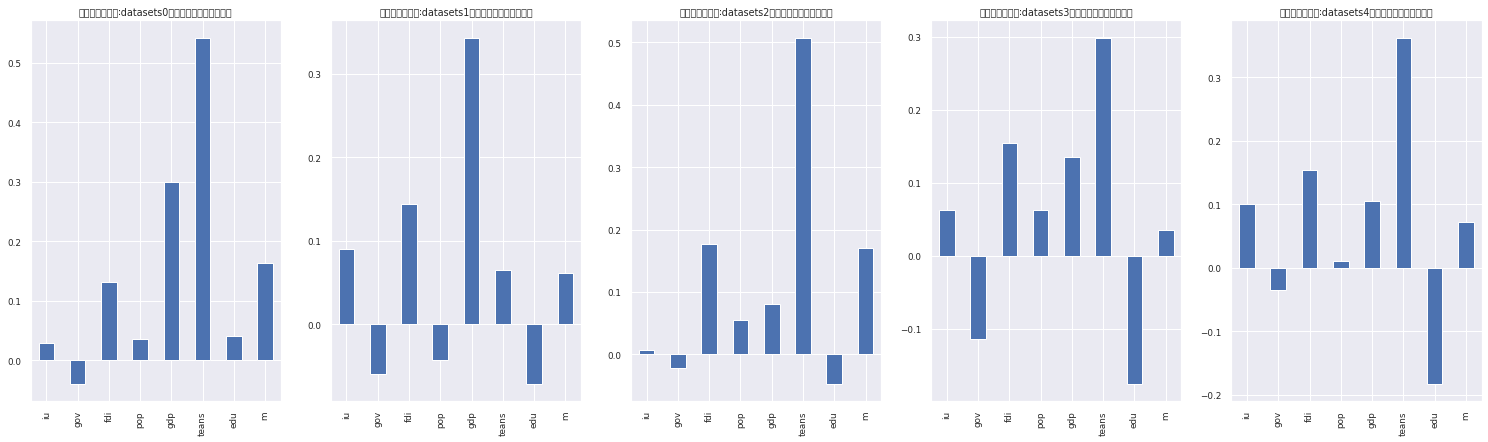

In [182]:
sns.set ( font= ' Arial Unicode Ms ' ,font_scale=0.8 )
mth_name = ["datasets0" ,"datasets1" ,"datasets2","datasets3","datasets4" ]
plt.figure( figsize=( 26,7))
i = 0
for j in range(len(datasets)):
    i += 1
    ax =plt.subplot (1,5,i)
    ax = ((datasets[j].mean()-data0.mean())/data0.mean()*100).plot(
        kind= 'bar' ,
        title='多重填补数据集∶{}处理缺失值后均值变化率'.format(mth_name[j]))
ax.set_xlabel( '' ,fontsize = 10)
ax.set_ylabe1 ( '%change ' )


In [178]:
data_full=data0.copy()
data_full.isnull().sum()

iu        6
gov       4
fdi      12
pop       4
gdp       7
teans    60
edu      29
m         6
dtype: int64

In [179]:
data_full.columns

Index(['iu', 'gov', 'fdi', 'pop', 'gdp', 'teans', 'edu', 'm'], dtype='object')

In [209]:
#误，应当是绝对值最小
import sys
df1= pd.concat([df[0],df[1],df[2],df[3],df[4]],axis=1)
df1.columns = ['0', '1', '2', '3', '4']
df1.min().index
df1.idxmin(axis=1)
#df['max_idx'] = df.idxmax(axis=1) #求一行的最大值对应的索引
#df['max_val']= df.max(axis=1) #取出该最大值
#a = df.drop(columns=['max_idx','max_val'])
#a['min_idx'] = a.idxmin(axis=1)
#a['min_val'] = a.min(axis=1)

iu       2
gov      3
fdi      0
pop      1
gdp      2
teans    1
edu      4
m        3
dtype: object

In [198]:
df1

,0,1,2,3,4
iu,0.028485,0.089703,0.007587,0.062115,0.099921
gov,-0.039042,-0.059320,-0.021741,-0.113244,-0.034283
fdi,0.130805,0.144394,0.177438,0.154793,0.153579
pop,0.035518,-0.042373,0.055198,0.062119,0.010329
gdp,0.299294,0.343364,0.080468,0.134638,0.105445
teans,0.542054,0.065234,0.507841,0.298642,0.362581
edu,0.040137,-0.071132,-0.046687,-0.174779,-0.181864
m,0.162665,0.061085,0.170851,0.035685,0.072315


In [204]:
data_full.loc[:,'iu']=datasets[2]['iu']
data_full.loc[:,'gov']=datasets[2]['gov']
data_full.loc[:,'fdi']=datasets[0]['fdi']
data_full.loc[:,'pop']=datasets[4]['pop']
data_full.loc[:,'gdp']=datasets[2]['gdp']
data_full.loc[:,'teans']=datasets[1]['teans']
data_full.loc[:,'edu']=datasets[0]['edu']
data_full.loc[:,'m']=datasets[3]['m']

In [205]:
data_full.isnull().sum()

iu       0
gov      0
fdi      0
pop      0
gdp      0
teans    0
edu      0
m        0
dtype: int64

In [206]:
(data_full.mean()-data0.mean())/data0.mean()*100

iu       0.007587
gov     -0.021741
fdi      0.130805
pop      0.010329
gdp      0.080468
teans    0.065234
edu      0.040137
m        0.035685
dtype: float64

In [217]:
data_full.to_excel('D:\\学校\\毕业论文\\数据\\城市群\\mice多重插补(误).xlsx',index=False)